# Mean-Variance Model

## Exercise 2. 
### Task 0: Cleaning Data and Importing Libraries: 

In [2]:
#import required libraries: 
import gurobipy as gb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#load the data
df=pd.read_excel("/Users/javlon/Desktop/data/data.xlsx", sheet_name="Returns S&P Mib 30 ", index_col=0, parse_dates=True)
df.head(2)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
Dates,,,,,,,,,,,,,,,,,,,,
2004-01-01,0.056941,0.055085,-0.005061,-0.001376,0.038502,0.004092,-0.003996,-0.023231,0.036722,-0.018517,0.023003,0.008654,-0.025495,-0.028095,0.134228,-0.035847,0.039152,-0.031417,0.027356,-0.027555
2004-02-01,-0.025385,-0.097992,-0.083576,-0.046853,-0.041082,0.020377,-0.064916,-0.025405,-0.035421,-0.140655,-0.066209,-0.094376,-0.037007,-0.009937,0.064431,-0.106229,-0.009411,-0.077847,0.004931,-0.083825


In [5]:
# we can drop the index name, and change the date format appropriately
df.index.name=None
df.index = df.index.strftime('%b-%Y')
df.head(2)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
Jan-2004,0.056941,0.055085,-0.005061,-0.001376,0.038502,0.004092,-0.003996,-0.023231,0.036722,-0.018517,0.023003,0.008654,-0.025495,-0.028095,0.134228,-0.035847,0.039152,-0.031417,0.027356,-0.027555
Feb-2004,-0.025385,-0.097992,-0.083576,-0.046853,-0.041082,0.020377,-0.064916,-0.025405,-0.035421,-0.140655,-0.066209,-0.094376,-0.037007,-0.009937,0.064431,-0.106229,-0.009411,-0.077847,0.004931,-0.083825


In [6]:
# since the stocks are given in the range from A1 to A20, we prepared dictionary to replace them with their respective names
stocks = [
    "AL", "AGL", "AUTO", "NTV", "BFI", "BIN", "BPM", "BPVN", "BNL", "BPU", "BUL", "CAP", 
    "EDN", "ENEL", "ENI", "FWB", "F", "FNC", "G", "ES"
]

stock_dict = {f"A{i+1}": stock for i, stock in enumerate(stocks)}

# now we can replace them
df = df.rename(columns=stock_dict)
df.head(2)

,AL,AGL,AUTO,NTV,BFI,BIN,BPM,BPVN,BNL,BPU,BUL,CAP,EDN,ENEL,ENI,FWB,F,FNC,G,ES
Jan-2004,0.056941,0.055085,-0.005061,-0.001376,0.038502,0.004092,-0.003996,-0.023231,0.036722,-0.018517,0.023003,0.008654,-0.025495,-0.028095,0.134228,-0.035847,0.039152,-0.031417,0.027356,-0.027555
Feb-2004,-0.025385,-0.097992,-0.083576,-0.046853,-0.041082,0.020377,-0.064916,-0.025405,-0.035421,-0.140655,-0.066209,-0.094376,-0.037007,-0.009937,0.064431,-0.106229,-0.009411,-0.077847,0.004931,-0.083825


---

## Exercise 2.1 
### Task 1: Compute the expected returns of all assets in the market and the matrix of variances and covariances. 
### Task 2: Formulate and solve the Markowitz model for finding the maximum possible expected return value for an efficient portfolio (ER_max)
### Task 3: Formulate and solve the Markowitz model to find the minimum possible expected return value for an efficient portfolio (ER_min).
### Task 4: Fix 5 different values for the portfolio expected return in the range (ER_min, ER_max), denoting them by μ₁, μ₂, μ₃, μ₄, μ₅.

---

### Task 1: Compute the expected returns of all assets in the market and the matrix of variances and covariances

In [7]:
#expected returns are found as follows, since the data frame is already about the returns we can just take the mean for an asset for the whole period. 
expected_returns = df[stocks].mean()
expected_returns.head(2)

AL     0.001935
AGL    0.028860
dtype: float64

In [8]:
# Compute variance and covariance matrix
covariance_matrix = df[stocks].cov()
covariance_matrix.head(2)

,AL,AGL,AUTO,NTV,BFI,BIN,BPM,BPVN,BNL,BPU,BUL,CAP,EDN,ENEL,ENI,FWB,F,FNC,G,ES
AL,0.005113,0.000429,0.001942,0.000599,0.000211,0.000246,0.000022,-0.000506,0.000008,0.001111,0.000096,0.001030,0.001152,0.000063,0.000536,0.001054,0.000214,0.003113,0.001102,0.000578
AGL,0.000429,0.006196,0.002060,0.001682,0.001280,0.001742,0.002319,0.001718,0.002281,0.002289,0.001349,0.001539,0.001463,0.001753,0.001833,0.001800,0.001016,0.002068,0.001396,0.000841


### Model Implementation

### Task 2: Formulate and solve the Markowitz model for finding the maximum possible expected return value for an efficient portfolio (ER_max)

In [32]:
# Create model
m = gb.Model()

# Add variables for portfolio weights
x = pd.Series(m.addVars(stocks, lb=0, name='X'), index=stocks)

# Compute portfolio variance and return
portfolio_variance = covariance_matrix.dot(x).dot(x)
portfolio_return = expected_returns.dot(x)

# Add objective function: Maximize portfolio return
m.setObjective(portfolio_return, sense=gb.GRB.MAXIMIZE)

# Add budget constraint: Sum of weights equals 1
m.addConstr(x.sum() == 1, name="budget")

# Add portfolio variance constraint: Variance less than or equal to sigma_squared
# Here I relaxed the constraint because if we fix the sigma, the model could not find
# the optimal solution and the output was infeasable or unbound. 
sigma_squared = 2
m.addConstr(portfolio_variance <= sigma_squared, name="variance_constraint")

# Optimize model
m.optimize()

# Display results
if m.status == gb.GRB.OPTIMAL:
    weights = pd.Series({stock: x[stock].X for stock in stocks})
    print("Optimal Portfolio Weights:")
    print(weights)
    print(f"ER_max: {portfolio_return.getValue()}")
    print(f"Portfolio Variance: {portfolio_variance.getValue()}")
else:
    print("No feasible solution found.")

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[arm] - Darwin 24.1.0 24B91)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 20 columns and 20 nonzeros
Model fingerprint: 0xcdfb6fb3
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [2e-05, 6e-03]
  Objective range  [3e-04, 3e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [2e+00, 2e+00]
Presolve time: 0.00s
Presolved: 1 rows, 20 columns, 20 nonzeros
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.47337501e-02  1.07226095e-02  3.17e+00 3.64e-01  1.56e-01     0s
   1   1.50672255e-02  4.00025945e-02  1

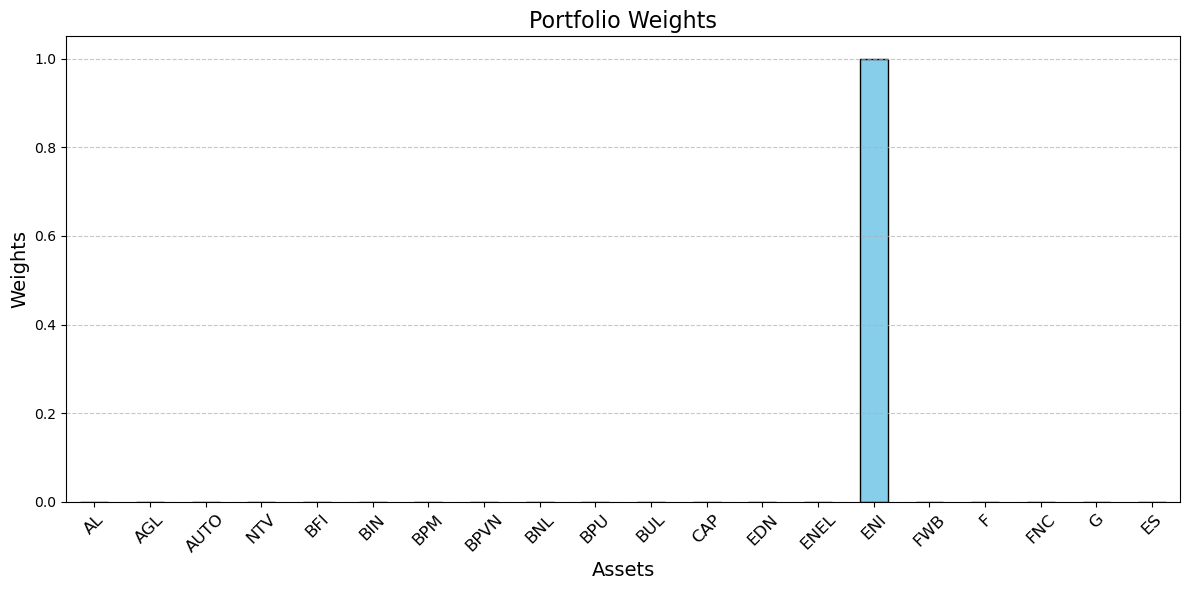

In [33]:
plt.figure(figsize=(12, 6))
weights.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Portfolio Weights", fontsize=16)
plt.xlabel("Assets", fontsize=14)
plt.ylabel("Weights", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("/Users/javlon/Documents/GitHub/RedPill/FOAM/Analysis/Portfolio_Weights_for_ER_max", dpi=300)
plt.show()

### Task 3: Formulate and solve the Markowitz model to find the minimum possible expected return value for an efficient portfolio (ER_min).

In [34]:
# Create model
m = gb.Model()

# Add variables for portfolio weights
x = pd.Series(m.addVars(stocks, lb=0, name='X'), index=stocks)

# Compute portfolio variance and return
portfolio_variance = covariance_matrix.dot(x).dot(x)
portfolio_return = expected_returns.dot(x)

# Add objective function: Minimize portfolio return
m.setObjective(portfolio_return, sense=gb.GRB.MINIMIZE)

# Add budget constraint: Sum of weights equals 1
m.addConstr(x.sum() == 1, name="budget")

# Add portfolio variance constraint: Variance less than or equal to sigma_squared
# Here I relaxed the constraint because if we fix the sigma, the model could not find
# the optimal solution and the output was infeasable or unbound. 
sigma_squared = 2
m.addConstr(portfolio_variance <= sigma_squared, name="variance_constraint")

# Optimize model
m.optimize()

# Display results
if m.status == gb.GRB.OPTIMAL:
    weights = pd.Series({stock: x[stock].X for stock in stocks})
    print("Optimal Portfolio Weights:")
    print(weights)
    print(f"ER_min: {portfolio_return.getValue()}")
    print(f"Portfolio Variance: {portfolio_variance.getValue()}")
else:
    print("No feasible solution found.")

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[arm] - Darwin 24.1.0 24B91)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 20 columns and 20 nonzeros
Model fingerprint: 0x2d3a58aa
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [2e-05, 6e-03]
  Objective range  [3e-04, 3e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [2e+00, 2e+00]
Presolve time: 0.00s
Presolved: 1 rows, 20 columns, 20 nonzeros
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.47337501e-02  0.00000000e+00  3.17e+00 1.51e-01  1.20e-01     0s
   1   6.11364084e-03 -1.30002487e-02  1

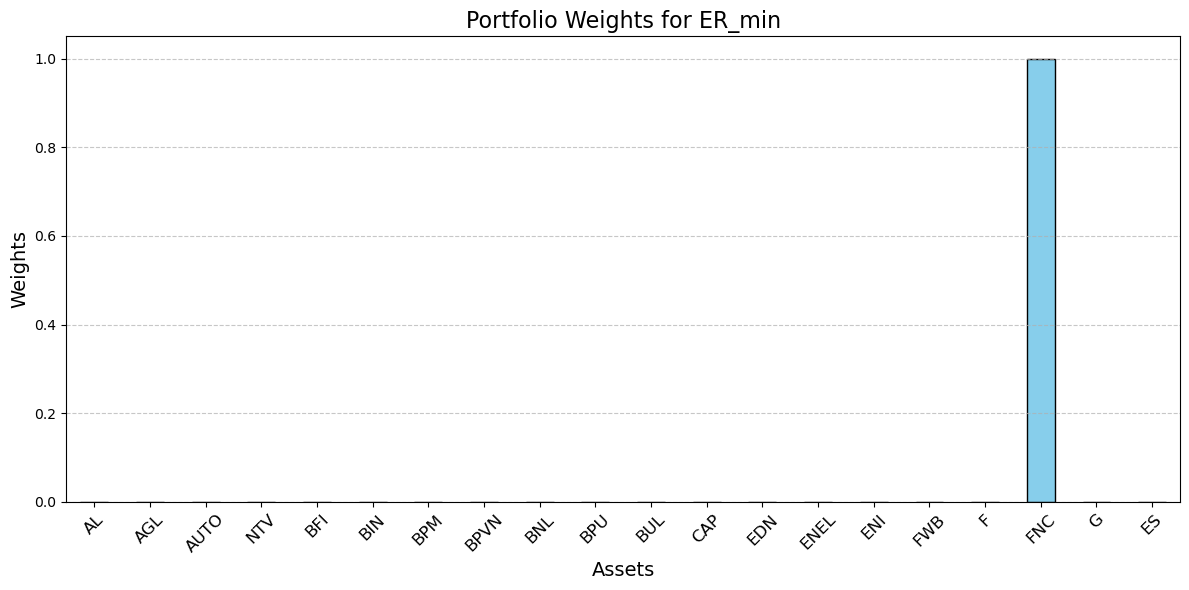

In [35]:
plt.figure(figsize=(12, 6))
weights.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Portfolio Weights for ER_min", fontsize=16)
plt.xlabel("Assets", fontsize=14)
plt.ylabel("Weights", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("/Users/javlon/Documents/GitHub/RedPill/FOAM/Analysis/Portfolio_Weights_for_ER_min", dpi=300)
plt.show()


### Task 4: Fix 5 different values for the portfolio expected return in the range (ER_min, ER_max), denoting them by μ₁, μ₂, μ₃, μ₄, μ₅.

In [41]:
# Given values for ER_min and ER_max
ER_min = -0.009408867882700435
ER_max = 0.03348577185008574

# Generate 5 evenly spaced values in the range (ER_min, ER_max)
mu_values = np.linspace(ER_min, ER_max, 5)
mu1, mu2, mu3, mu4, mu5 = mu_values

print(f"mu1: {mu1:.8f}")
print(f"mu2: {mu2:.8f}")
print(f"mu3: {mu3:.8f}")
print(f"mu4: {mu4:.8f}")
print(f"mu5: {mu5:.8f}")

mu1: -0.00940887
mu2: 0.00131479
mu3: 0.01203845
mu4: 0.02276211
mu5: 0.03348577


## Exercise 2.2
* Solve model (MwV) formulated in 1.1 for each possible value μ₁, μ₂, μ₃, μ₄, μ₅. Denote by P_μ₁, P_μ₂, P_μ₃, P_μ₄, P_μ₅ the optimal portfolios so found.

In [51]:
# Define the list of mu values
mu_values = [mu1, mu2, mu3, mu4, mu5]

# Create a dictionary to store results
results = {}

for i, mu in enumerate(mu_values, 1):
    # Create a new model
    m = gb.Model()

    # Add variables for portfolio weights
    x = pd.Series(m.addVars(stocks, lb=0, name='X'), index=stocks)

    # Compute portfolio variance and return
    portfolio_variance = covariance_matrix.dot(x).dot(x)
    portfolio_return = expected_returns.dot(x)

    # Add objective function: Minimize portfolio variance
    m.setObjective(portfolio_variance, sense=gb.GRB.MINIMIZE)

    # Add budget constraint: Sum of weights equals 1
    m.addConstr(x.sum() == 1, name="budget")

    # Add portfolio return constraint
    m.addConstr(portfolio_return == mu, name="return_constraint")

    # Optimize model
    m.optimize()

    # Store results if feasible solution found
    if m.status == gb.GRB.OPTIMAL:
        weights = pd.Series({stock: x[stock].X for stock in stocks})
        results[f"mu{i}"] = {
            "mu_value": mu,
            "weights": weights,
            "portfolio_variance": portfolio_variance.getValue(),
        }
    else:
        results[f"mu{i}"] = "No feasible solution found"

# Display results
for key, result in results.items():
    if isinstance(result, dict):
        print(f"\nResults for {key}:")
        print(f"mu value: {result['mu_value']:.8f}")
        print(f"P_mu{key[-1]}:")
        print(result['weights'])
        print(f"Portfolio Variance: {result['portfolio_variance']:.8f}")
    else:
        print(f"\nResults for {key}: {result}")


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[arm] - Darwin 24.1.0 24B91)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 20 columns and 40 nonzeros
Model fingerprint: 0x2849e4cf
Model has 210 quadratic objective terms
Coefficient statistics:
  Matrix range     [3e-04, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [3e-05, 1e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [9e-03, 1e+00]
Presolve time: 0.01s
Presolved: 2 rows, 20 columns, 40 nonzeros
Presolved model has 210 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 19
 AA' NZ     : 2.100e+02
 Factor NZ  : 2.310e+02
 Factor Ops : 3.311e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   9.18938432e+03 -9.18938432e+03  1.85e+04 5.25e-02  1.00e+06     0s


Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   9.19068856e+03 -9.19068856e+03  1.85e+04 1.58e-01  1.00e+06     0s
   1   7.13216227e+02 -7.27559915e+02  7.60e+02 6.51e-03  4.32e+04     0s
   2   4.11704947e-02 -1.44404647e+01  4.41e+00 3.78e-05  2.75e+02     0s
   3   3.03481871e-03 -2.19850291e+00  2.10e-01 1.80e-06  1.53e+01     0s
   4   4.42316932e-03 -3.38667944e-02  1.53e-03 1.31e-08  1.60e-01     0s
   5   4.44217075e-03  4.36525025e-03  1.54e-06 1.32e-11  2.22e-04     0s
   6   4.44218990e-03  4.44203607e-03  1.54e-09 1.32e-14  3.45e-07     0s
   7   4.44218992e-03  4.44218974e-03  1.70e-12 6.82e-13  3.46e-10     0s

Barrier solved model in 7 iterations and 0.01 seconds (0.00 work units)
Optimal objective 4.44218992e-03


Results for mu1:
mu value: -0.00940887
P_mu1:
AL      6.554589e-14
AGL     5.774213e-14
AUTO    8.845456e-14
NTV     8.777419e-14
BFI     2.949882e-13
BIN     6.892105e-14
BPM     7.874035e-14
BPVN    1.688985e-13
BNL     7.43

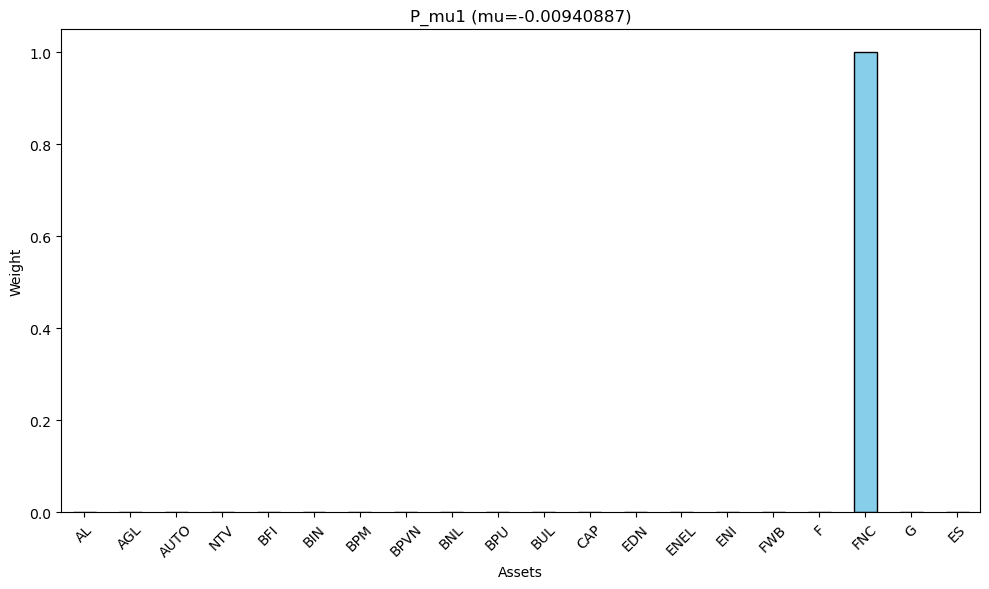

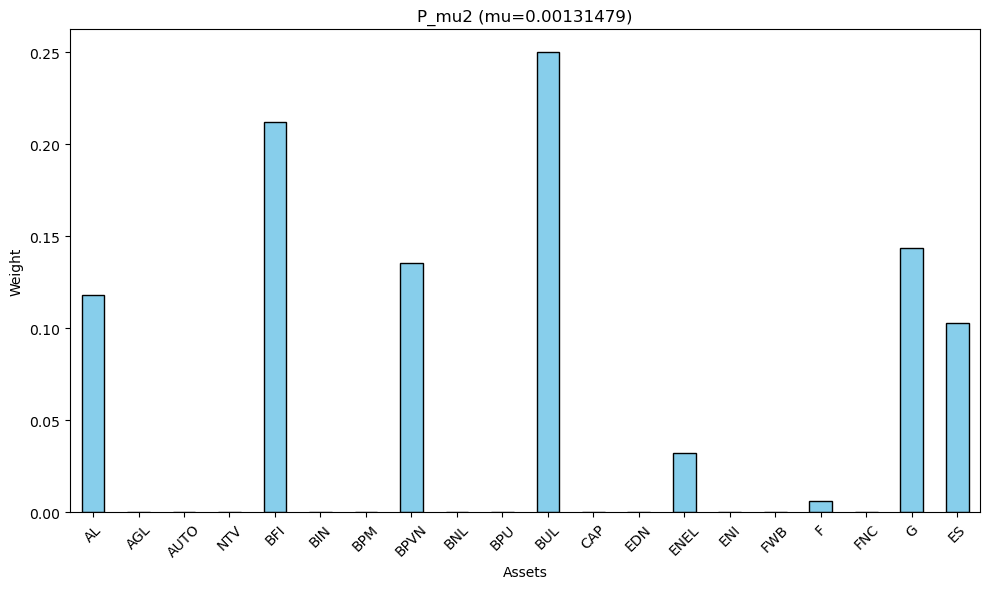

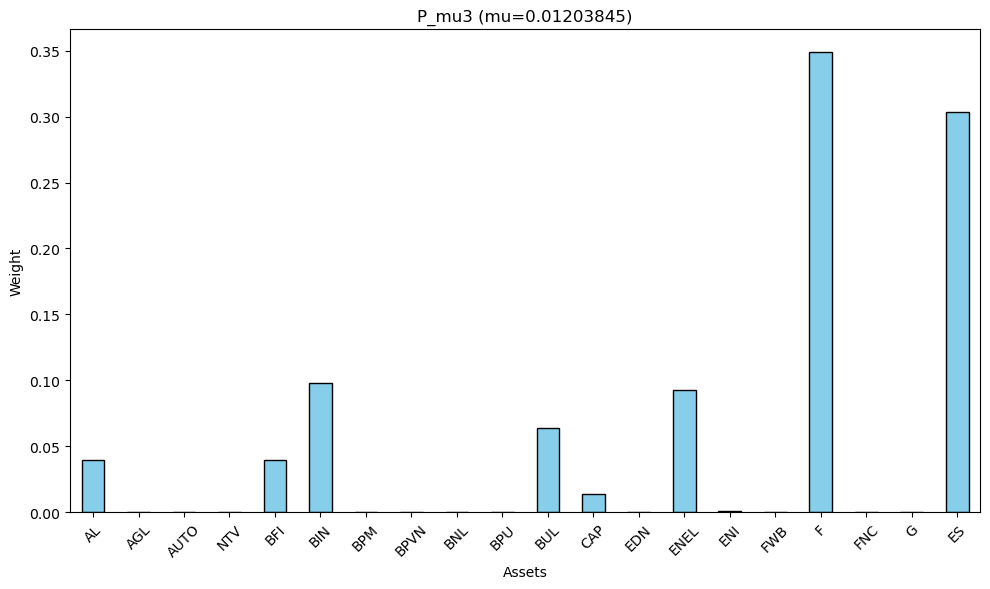

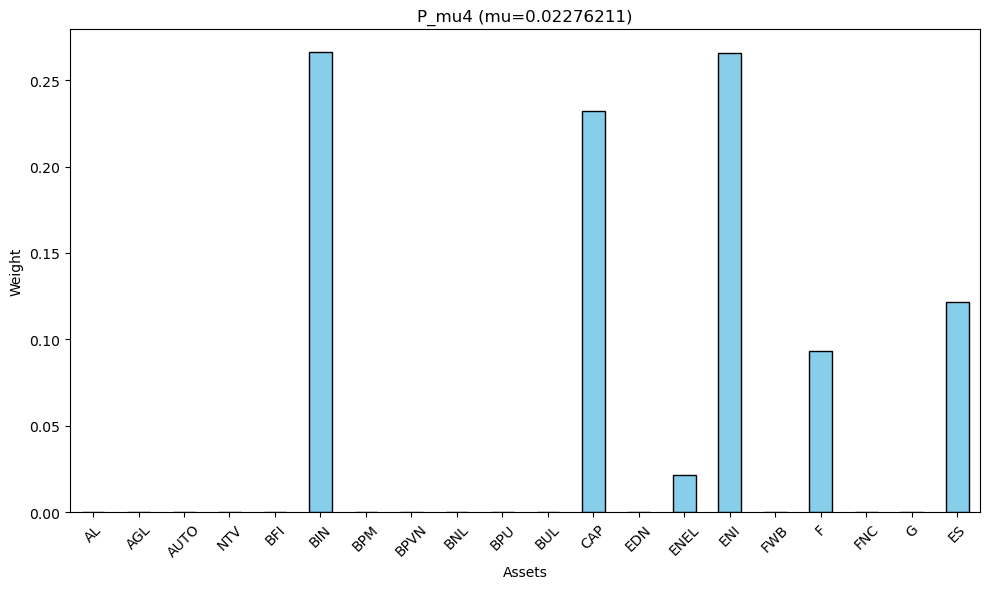

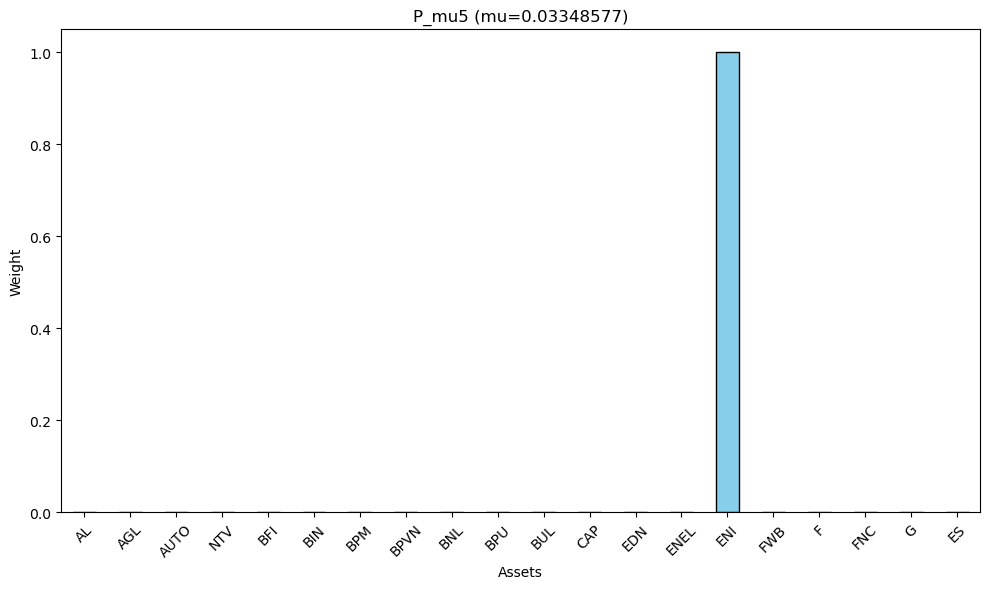

In [53]:
# Plotting the results
for key, result in results.items():
    if isinstance(result, dict):
        weights = result["weights"]
        mu_value = result["mu_value"]

        # Create a bar plot for the weights
        plt.figure(figsize=(10, 6))
        weights.plot(kind="bar", color="skyblue", edgecolor="black")
        plt.title(f"P_mu{key[-1]} (mu={mu_value:.8f})")
        plt.xlabel("Assets")
        plt.ylabel("Weight")
        plt.xticks(rotation=45)
        plt.tight_layout()

        # Save the plot
        plt.savefig(f"P_mu{key[-1]}_weights.png", dpi=200)
        plt.show()

In [57]:
# Define the list of mu values
mu_values = [mu1, mu2, mu3, mu4, mu5]

# Create a dictionary to store results
results = {}

# Cardinality constraint
k = 2  # Fix the number of assets to be selected

for i, mu in enumerate(mu_values, 1):
    # Create a new model
    m = gb.Model()

    # Add variables for portfolio weights
    x = pd.Series(m.addVars(stocks, lb=0, name='X'), index=stocks)
    # Introduce binary variables to indicate if a stock is selected
    y = pd.Series(m.addVars(stocks, vtype=gb.GRB.BINARY, name='Y'), index=stocks)

    # Compute portfolio variance and return
    portfolio_variance = covariance_matrix.dot(x).dot(x)
    portfolio_return = expected_returns.dot(x)

    # Add objective function: Minimize portfolio variance
    m.setObjective(portfolio_variance, sense=gb.GRB.MINIMIZE)

    # Add budget constraint: Sum of weights equals 1
    m.addConstr(x.sum() == 1, name="budget")

    # Add portfolio return constraint
    m.addConstr(portfolio_return == mu, name="return_constraint")

    for stock in stocks:
        m.addConstr(x[stock] <= y[stock], name=f"selection_{stock}")
    m.addConstr(y.sum() == k, name="cardinality_constraint")

    # Optimize model
    m.optimize()

    # Store results if feasible solution found
    if m.status == gb.GRB.OPTIMAL:
        weights = pd.Series({stock: x[stock].X for stock in stocks})
        results[f"mu{i}"] = {
            "mu_value": mu,
            "weights": weights,
            "portfolio_variance": portfolio_variance.getValue(),
        }
    else:
        results[f"mu{i}"] = "No feasible solution found"

# Display results
for key, result in results.items():
    if isinstance(result, dict):
        print(f"\nResults for {key}:")
        print(f"mu value: {result['mu_value']:.8f}")
        print(f"PC_mu{key[-1]}:")
        print(result['weights'])
        print(f"Portfolio Variance: {result['portfolio_variance']:.8f}")
    else:
        print(f"\nResults for {key}: {result}")


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[arm] - Darwin 24.1.0 24B91)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 23 rows, 40 columns and 100 nonzeros
Model fingerprint: 0xf189ea27
Model has 210 quadratic objective terms
Variable types: 20 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [3e-04, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [3e-05, 1e-02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [9e-03, 2e+00]
Found heuristic solution: objective 0.0053638
Presolve removed 2 rows and 2 columns
Presolve time: 0.01s
Presolved: 21 rows, 38 columns, 90 nonzeros
Presolved model has 210 quadratic objective terms
Found heuristic solution: objective 0.0053638
Variable types: 20 continuous, 18 integer (18 binary)

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 8 (of 8 available processors)

Solution count 1: 0

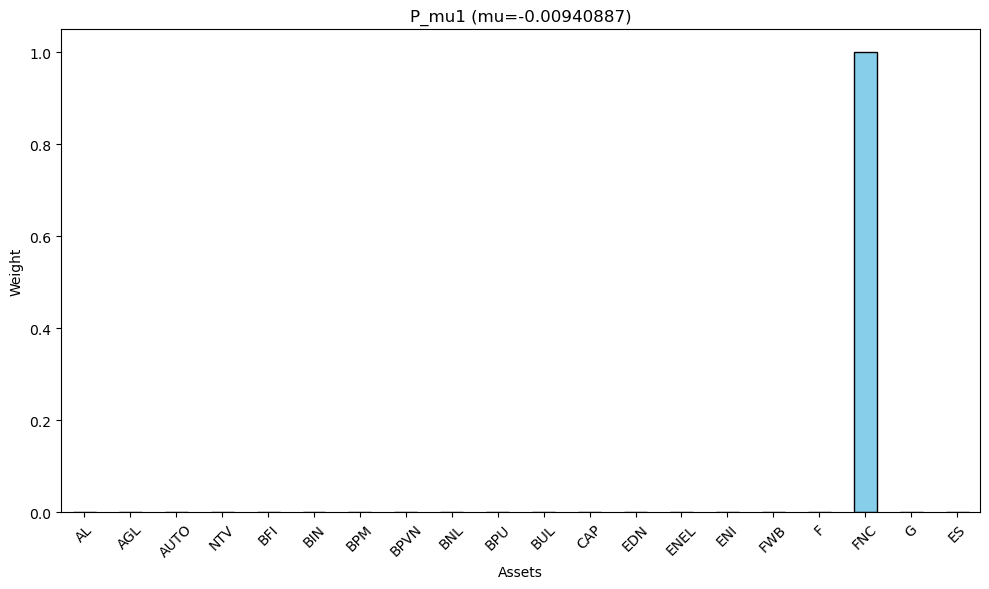

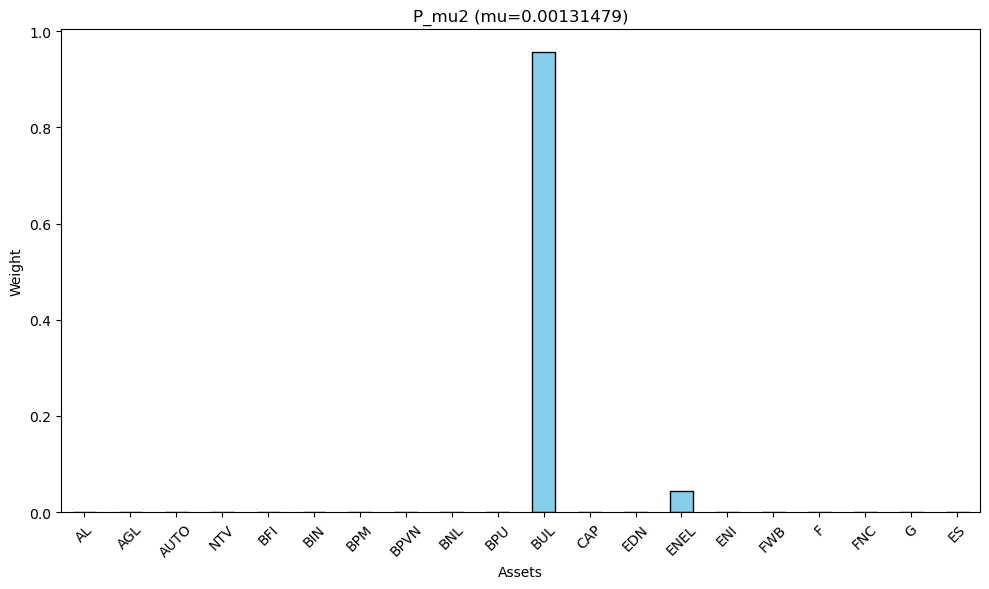

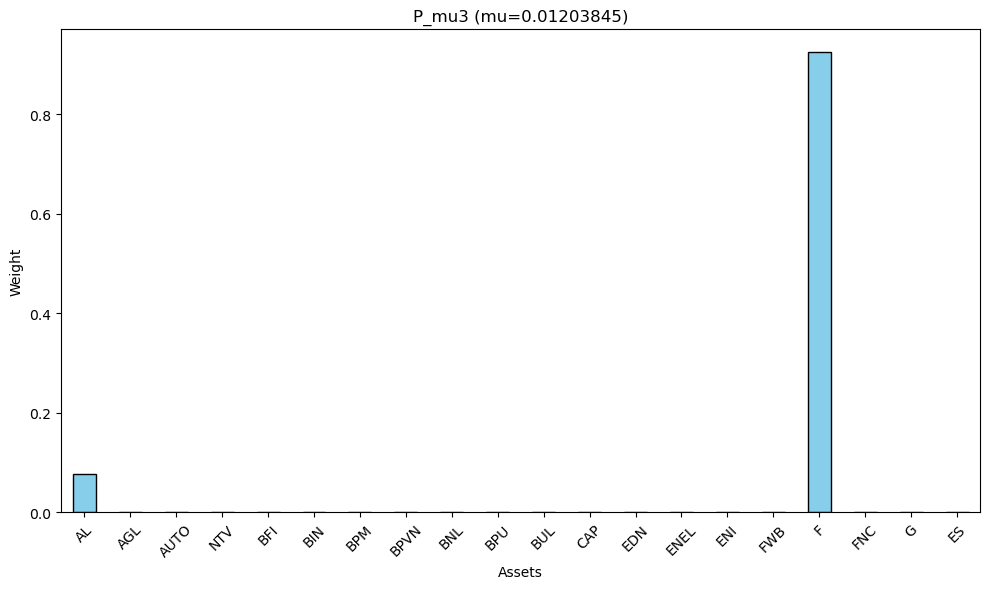

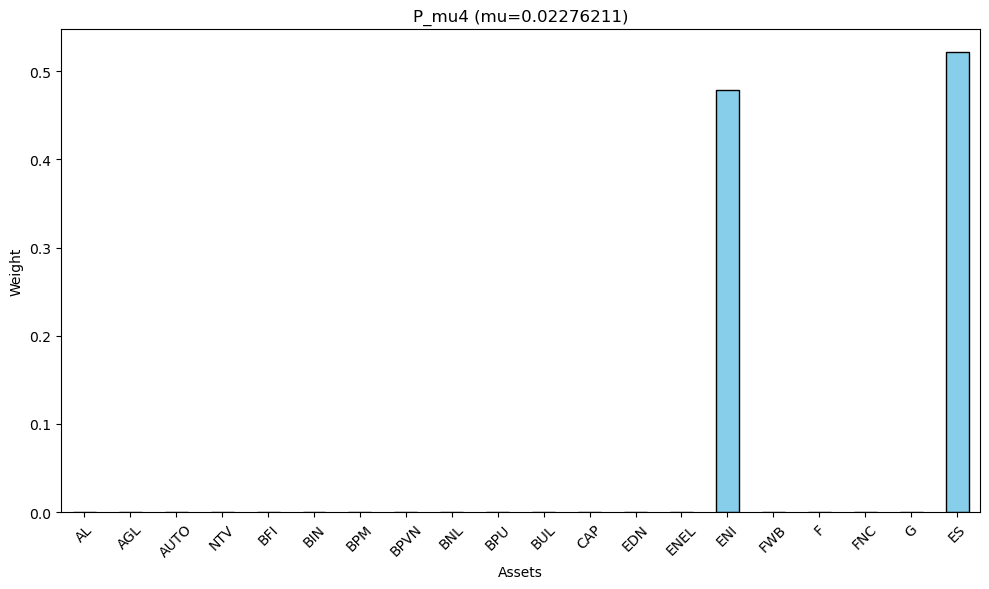

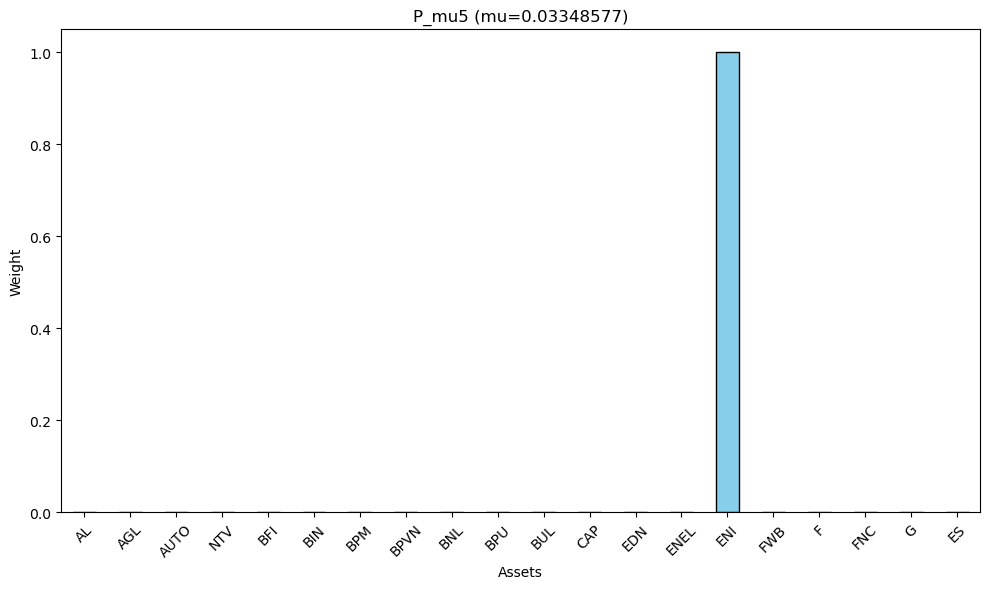

In [59]:
# Plotting the results
for key, result in results.items():
    if isinstance(result, dict):
        weights = result["weights"]
        mu_value = result["mu_value"]

        # Create a bar plot for the weights
        plt.figure(figsize=(10, 6))
        weights.plot(kind="bar", color="skyblue", edgecolor="black")
        plt.title(f"P_mu{key[-1]} (mu={mu_value:.8f})")
        plt.xlabel("Assets")
        plt.ylabel("Weight")
        plt.xticks(rotation=45)
        plt.tight_layout()

        # Save the plot
        plt.savefig(f"PC_mu{key[-1]}_weights with k=2.png", dpi=200)
        plt.show()